<a href="https://colab.research.google.com/github/gusalvarez10/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

#### El data frame está definido como df.
Lo primero a realizar es la lectura del **dataset**:

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# **RESPUESTAS EJERCICIO 1**

#### Cantidad de filas y columnas del dataset:

In [5]:
df.shape

(6095, 48)

#### Información del dataset como la cantidad de columnas no nulas y el tipo de dato por columna:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   profile_gender                                6095 non-null   object 
 1   profile_age                                   6095 non-null   int64  
 2   work_country                                  6095 non-null   object 
 3   work_province                                 6095 non-null   object 
 4   profile_years_experience                      6095 non-null   float64
 5   work_years_in_company                         6095 non-null   float64
 6   work_years_in_current_position                6095 non-null   float64
 7   work_people_in_charge_of                      6095 non-null   int64  
 8   profile_studies_level                         6095 non-null   object 
 9   profile_studies_level_state                   6095 non-null   o

#### Vista acotada de los datos:




In [7]:
df.head(5)

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


#### 1.1 Selección de las columnas relevamentes para analizar.

Principalmente se va a enfocar el analisis en las columnas:


*   salary_in_usd
*   salary_monthly_BRUTO
*   tools_programming_languages



In [8]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO', 'salary_in_usd']

#### Inspección de valores de la columna salary_in_usd:




In [9]:
df.salary_in_usd.unique()

array([nan, 'Mi sueldo está dolarizado'], dtype=object)

#### Se reemplazan los valores nulos en la columna salary_in_usd por *Mi sueldo no está dolarizado*:

In [10]:
df.salary_in_usd = df.salary_in_usd.fillna('Mi sueldo no está dolarizado')


#### Se comprueba nuevamente los valores únicos de la columna salary_in_usd:

In [11]:
df.salary_in_usd.unique()

array(['Mi sueldo no está dolarizado', 'Mi sueldo está dolarizado'],
      dtype=object)

#### 1.2 Se plantea la siguiente hipótesis:
**Un salario en dólares es un mejor salario.**

*Tomando que un mejor salario es un mayor salario.*

#### Cantidad de sueldos dolarizados y NO dolarizados:




In [12]:
#Sueldo dolarizados.

df[df['salary_in_usd'] == 'Mi sueldo está dolarizado'].shape[0]

676

In [13]:
#Sueldo no dolarizados.


df[df['salary_in_usd'] == 'Mi sueldo no está dolarizado'].shape[0]

5419

#### Como se planteó precedentemente, nuestra hipótesis parte de que un sueldo dolarizado es un mejor salario, entonces se va a analizar esa premisa:

In [14]:
# De esta manera seteo las opciones, en 2 decimales y agrego el simbolo $ a los valores.

pd.options.display.float_format = '{:,.2f}'.format

In [15]:
#Descripción de datos sin filtros

df.salary_monthly_BRUTO.describe()

count       6,095.00
mean      124,058.55
std       122,912.35
min             1.00
25%        61,595.00
50%        96,000.00
75%       145,000.00
max     2,180,000.00
Name: salary_monthly_BRUTO, dtype: float64

In [16]:
#Descripción de datos agrupado por salario en dólares:

df['salary_monthly_BRUTO'].groupby(df['salary_in_usd']).describe()

,count,mean,std,min,25%,50%,75%,max
salary_in_usd,,,,,,,,
Mi sueldo está dolarizado,676.00,"261,119.12","225,551.83",2.00,"119,805.00","195,500.00","350,000.00","2,080,000.00"
Mi sueldo no está dolarizado,"5,419.00","106,960.76","89,543.62",1.00,"60,000.00","90,000.00","134,000.00","2,180,000.00"


#### Se agrega un gráfico para una mejor visualización de los datos.

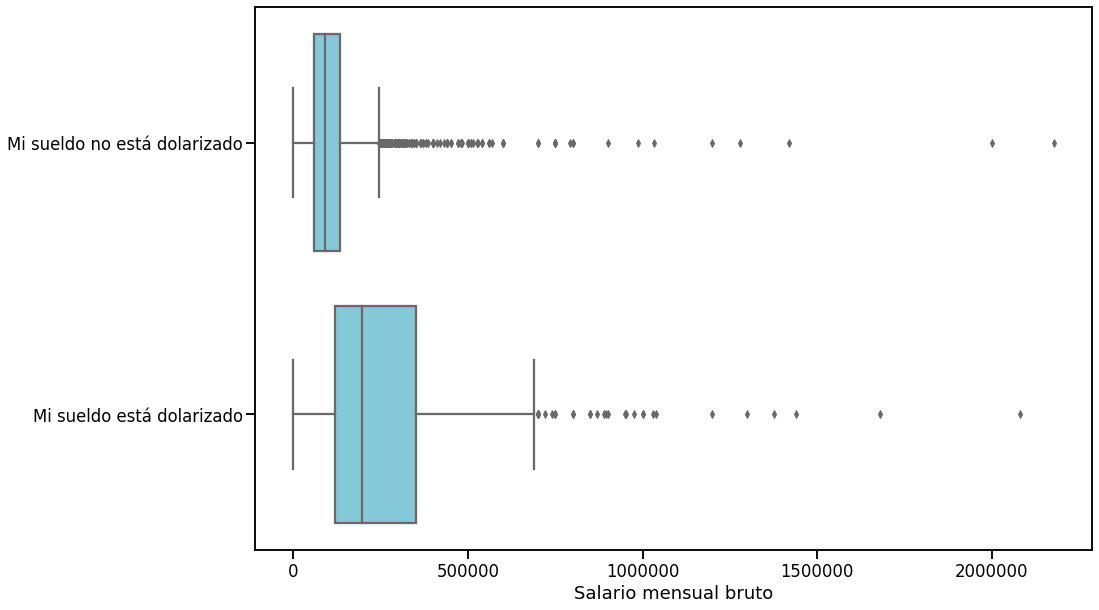

In [17]:
fig = plt.figure(figsize=(15,10))

seaborn.boxplot(data = df,
                x = 'salary_monthly_BRUTO',
                y = 'salary_in_usd',
                color = '#77d1e6',            
               )

plt.ticklabel_format(style = 'plain',
                     axis = 'x'
                    )

plt.xlabel('Salario mensual bruto')
plt.ylabel('')

plt.show()

#### Observando los datos resultados de la descripción de datos para los 3 casos descritos en la parte de arriba, se encuentra que el sueldo dolarizado es mejor ya que es mayor.

Hay que tener en cuenta que se tienen mínimos demasiados bajos que dan la pauta que pueden haber errores en los datos por ende se van a eliminar valores extremos para tener un análisis más enfocado en valores reales.

Investigando se tiene que el salario mínimo, vital y móvil para el periódo en el que se realizó la encuesta (Octubre 2020) era de $18.900 , por lo que parece un buen parámetro para filtrar el dataset y que sea el mínimo de la columna salary_monthly_BRUTO.
Para el caso de los máximos se considera que existen casos particulares que pueden cobrar esos salarios altos.

A continuación se muestra el código implementando este filtro:


In [18]:
# Se crea un nuevo dataset con sólo los valores de salario mensual bruto mayores a $18.900

dfn = df.loc[df['salary_monthly_BRUTO'] > 18900]

# Se muestra nuevamente la descripción de los datos agrupados por salario en dólares:

dfn['salary_monthly_BRUTO'].groupby(dfn['salary_in_usd']).describe()

,count,mean,std,min,25%,50%,75%,max
salary_in_usd,,,,,,,,
Mi sueldo está dolarizado,652.00,"270,676.76","223,991.28","20,000.00","122,250.00","200,000.00","350,000.00","2,080,000.00"
Mi sueldo no está dolarizado,"5,210.00","111,127.09","88,816.10","19,925.00","63,000.00","93,000.00","136,000.00","2,180,000.00"


#### Se observa que la diferencia en los datos es mínima, por lo que los mínimos no generan una afectación de importancia en la descripción de los datos.

#### Se genera un nuevo dataset **utilizando únicamente los salarios en dólares**



In [19]:
dfusd = df.loc[df['salary_in_usd'] == 'Mi sueldo está dolarizado']

dfusd

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
14,Hombre,42,Argentina,Córdoba,10.00,0.00,0.00,3,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Servicios / Consultoría de Software / Digital,3,7,"Descuentos varios (Mercado Pago, Clarín 365, C...",NaN
25,Mujer,30,Argentina,Ciudad Autónoma de Buenos Aires,12.00,0.00,4.00,14,Universitario,Completado,...,En un trabajo anterior,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,8,4,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
41,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,15.00,3.00,1.50,16,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,No,201-500,Producto basado en Software,9,10,"Abono de celular, Capacitaciones y/o cursos, C...","Medallia, auth0, wildlife"
43,Hombre,45,Argentina,Córdoba,29.00,2.00,2.00,0,Universitario,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,9,7,Clases de idiomas,NaN
60,Hombre,50,Argentina,Ciudad Autónoma de Buenos Aires,30.00,4.00,4.00,24,Universitario,Incompleto,...,En un trabajo anterior,¿Qué les importa?,NaN,NaN,1-10,Producto basado en Software,9,6,"Cuota para universidad / posgrados, Horarios f...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,14.00,1.00,8.00,0,Universitario,Completado,...,En un trabajo anterior,Heterosexual,NaN,NaN,201-500,Producto basado en Software,10,10,"Comidas pagas / subvencionadas, Estacionamient...",NaN
6024,Hombre,39,Argentina,Santa Fe,18.00,2.00,2.00,0,Universitario,Completado,...,Jamás,¿Qué les importa?,NaN,NaN,101-200,Producto basado en Software,7,9,"Horarios flexibles, Vacaciones flexibles (adic...",NaN
6079,Hombre,28,Argentina,Provincia de Buenos Aires,2.00,0.00,2.00,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,201-500,Servicios / Consultoría de Software / Digital,10,8,Ninguna de las anteriores,NaN
6080,Hombre,30,Argentina,San Luis,5.00,2.00,2.00,0,Terciario,Incompleto,...,En un trabajo anterior,Heterosexual,NaN,No,501-1000,Servicios / Consultoría de Software / Digital,10,10,"Clases de idiomas, Estacionamiento gratuito / ...","Init ag, Computercenter, DKB, n26"


### Conteo de frecuencias de los lenguajes de programación de todo el DF

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [20]:
dfusd.tools_programming_languages.head()

14    .NET, C#, Delphi, HTML, Java, Javascript, PHP,...
25                                              Ninguno
41                               Bash/Shell, Go, Python
43                                           Bash/Shell
60                                 C, C++, Java, Python
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.



In [21]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
dfusd.loc[:, 'cured_programming_languages'] = dfusd.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
dfusd_lang = dfusd.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(dfusd[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
dfusd_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_BRUTO,salary_in_usd,cured_programming_languages
14,.net,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,c#,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,delphi,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,html,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,java,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

**Selección de los 5 lenguajes de programación con mayor frecuencia**

In [22]:
language_count = dfusd_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:5]

,language,frequency
0,javascript,347
1,html,218
2,python,209
3,sql,186
4,css,161


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [23]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ['javascript', 'html','python', 'sql','css' ]

filtered_df_lang = dfusd_lang[dfusd_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:10]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,salary_in_usd,cured_programming_languages
14,html,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,javascript,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
14,sql,".NET, C#, Delphi, HTML, Java, Javascript, PHP,...","102,000.00",Mi sueldo está dolarizado,"[.net, c#, delphi, html, java, javascript, php..."
41,python,"Bash/Shell, Go, Python","450,000.00",Mi sueldo está dolarizado,"[bash/shell, go, python]"
60,python,"C, C++, Java, Python","480,000.00",Mi sueldo está dolarizado,"[c, c++, java, python]"
63,javascript,"Go, Javascript, Python, Ruby, TypeScript","170,200.00",Mi sueldo está dolarizado,"[go, javascript, python, ruby, typescript]"
63,python,"Go, Javascript, Python, Ruby, TypeScript","170,200.00",Mi sueldo está dolarizado,"[go, javascript, python, ruby, typescript]"
66,css,"CSS, Elixir, HTML, Javascript, Ruby, SQL, Type...","283,000.00",Mi sueldo está dolarizado,"[css, elixir, html, javascript, ruby, sql, typ..."
66,html,"CSS, Elixir, HTML, Javascript, Ruby, SQL, Type...","283,000.00",Mi sueldo está dolarizado,"[css, elixir, html, javascript, ruby, sql, typ..."
66,javascript,"CSS, Elixir, HTML, Javascript, Ruby, SQL, Type...","283,000.00",Mi sueldo está dolarizado,"[css, elixir, html, javascript, ruby, sql, typ..."


### 1.3 Medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje seleccionado

In [24]:
filtered_df_lang.groupby(filtered_df_lang['programming_language']).describe()

salary_monthly_BRUTO                                 \
                                    count       mean        std      min   
programming_language                                                       
css                                161.00 264,964.10 263,807.45   100.00   
html                               218.00 252,931.79 242,594.85   100.00   
javascript                         347.00 265,911.72 234,575.45   100.00   
python                             209.00 291,056.21 236,932.36     2.00   
sql                                186.00 255,154.33 220,668.97 1,100.00   

                                                                    
                            25%        50%        75%          max  
programming_language                                                
css                  104,812.00 182,219.00 350,000.00 2,080,000.00  
html                 100,000.00 179,110.12 350,000.00 2,080,000.00  
javascript           115,420.00 200,000.00 360,000.00 2,080,000.00  
python               140,000.00 220,000.00 360,000.00 1,680,000.00  
sql                  120,000.00 195,000.00 350,000.00 2,080,000.00

Comparación gráfica del Salario Bruto por cada Lenguaje de Programación elegido

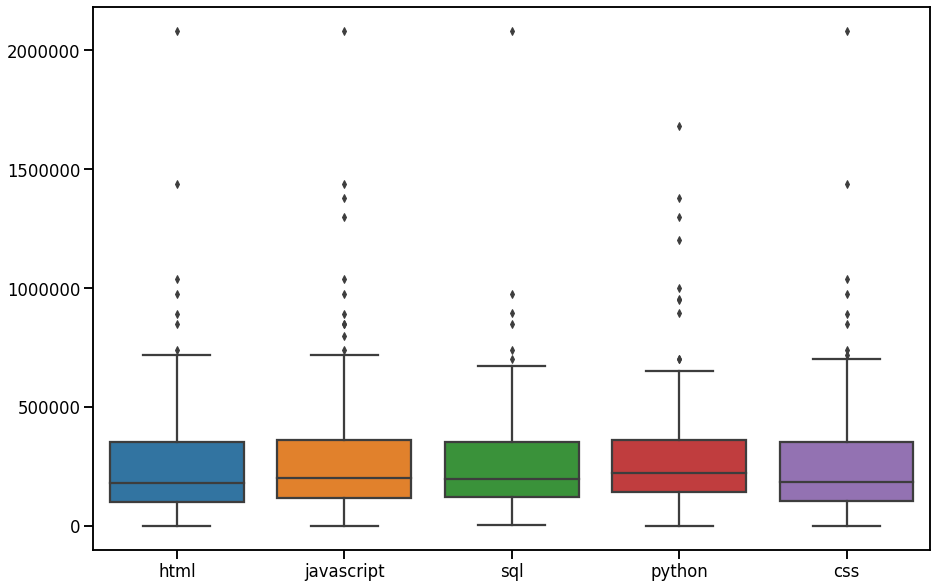

In [25]:
fig = plt.figure(figsize=(15,10))

seaborn.boxplot(data=filtered_df_lang, x='programming_language', y='salary_monthly_BRUTO'  )

plt.ticklabel_format(style = 'plain',
                    axis = 'y'
                   )

plt.xlabel('')
plt.ylabel('')

plt.show()

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

#### 2.1 Selección de las columnas relevamentes para analizar.

Se va a enfocar el analisis en las columnas:


*   salary_monthly_BRUTO
*   tools_programming_languages
*   profile_years_experience



In [26]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO', 'profile_years_experience']

#### Inspección de valores de la columna profile_years_experienced:

In [27]:
df.profile_years_experience.unique()

array([  3. ,   5. ,   2. ,  15. ,   9. ,   1. ,   0. ,  20. ,  10. ,
         4. ,  11. ,  13. ,  12. ,  16. ,  30. ,  14. ,  29. ,   8. ,
         6. ,  22. ,   1.5,   7. ,  25. ,  27. ,  26. ,  21. ,  17. ,
        31. ,  18. ,  35. ,   2.5,   6.5,  23. ,  24. ,   4.5,  19. ,
        32. ,  34. ,  39. ,   3.7,   3.5,  33. ,  36. ,  40. ,   2.8,
         2.4,   1.8,   1.7,   8.5,   5.5, 115. ,   1.6,  28. ,  37. ,
        43. ,   2.6,   3.1,  44. ,  38. ])

In [28]:
#Información estadística de la variable
df.profile_years_experience.describe()

count   6,095.00
mean        8.93
std         7.16
min         0.00
25%         3.00
50%         7.00
75%        13.00
max       115.00
Name: profile_years_experience, dtype: float64

(0.0, 115.0)

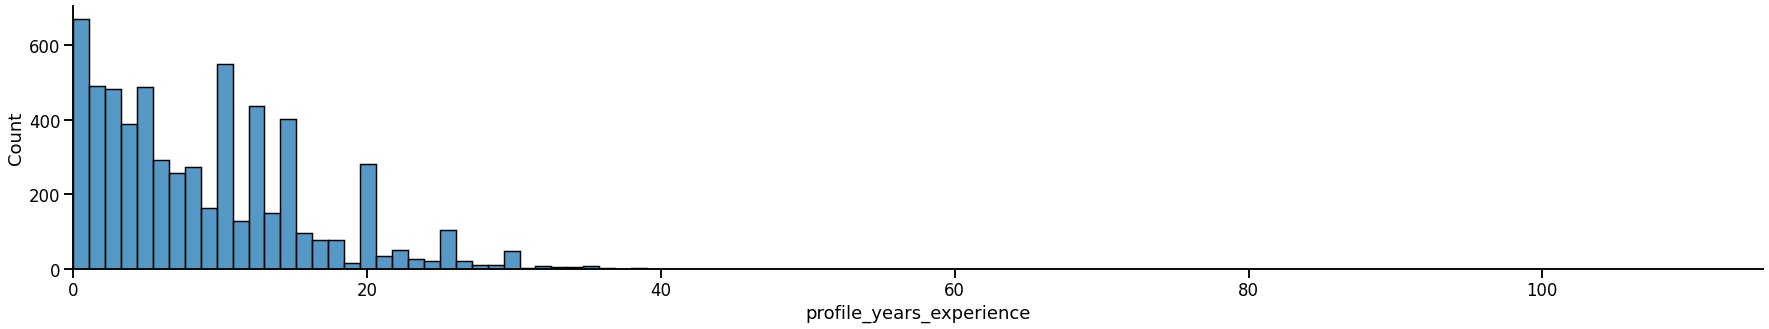

In [29]:
seaborn.displot(df['profile_years_experience'], aspect=5)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,115) # definimos los limites de x entre 0 y 115

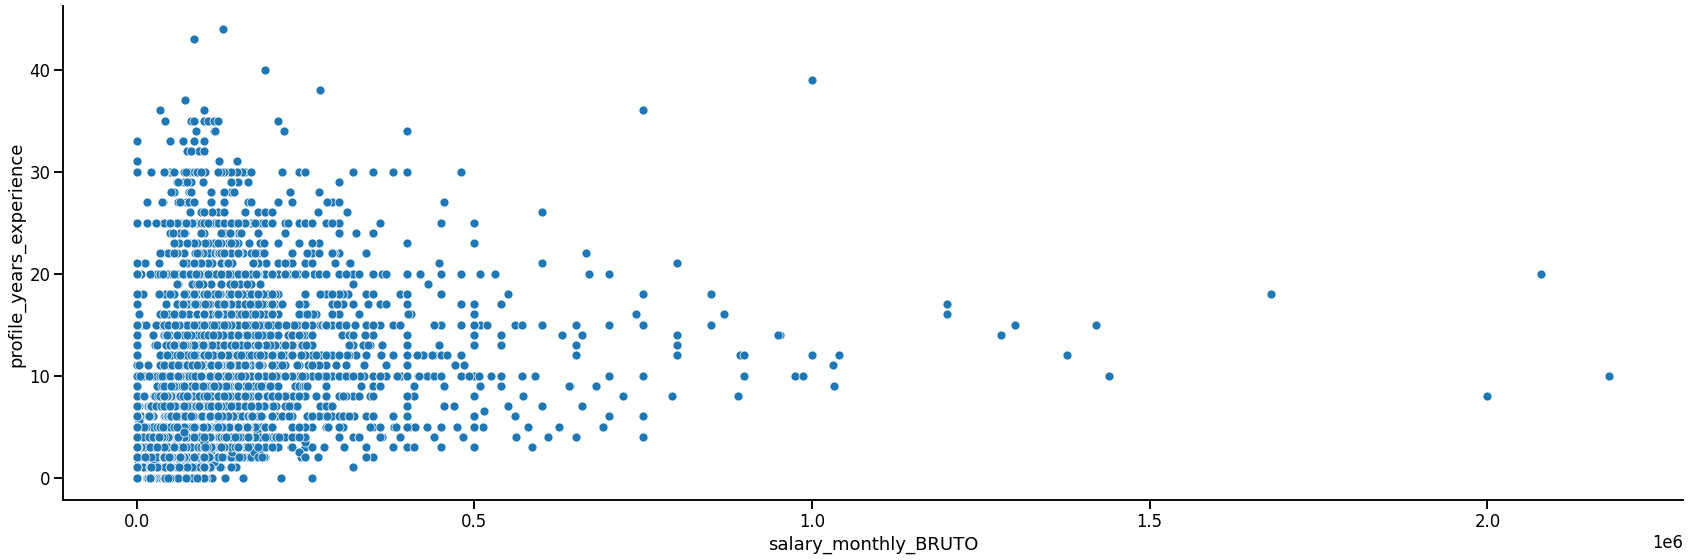

In [30]:
max_age = 99
seaborn.pairplot(data=df[df.profile_years_experience < max_age],
                 y_vars=['profile_years_experience', ],
                 x_vars=['salary_monthly_BRUTO'],
                 aspect=3, height=8)

In [31]:
# Se crea un nuevo dataset con sólo los valores de años de experiencia <= a 15

dfy = df.loc[df['profile_years_experience'] <= 15]

# Se muestra nuevamente la descripción de los datos:

dfy.profile_years_experience.describe()

count   5,171.00
mean        6.66
std         4.56
min         0.00
25%         3.00
50%         6.00
75%        10.00
max        15.00
Name: profile_years_experience, dtype: float64

De esta manera, observamos que el 84% de los encuestados tienen hasta 15 años de experiencia.

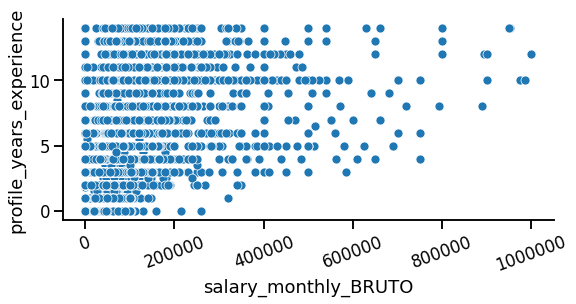

In [32]:
# Visualización de dispersión de datos para encuestados con hasta 15 años de antiguedad con salario bruto menor o igual a $1.000.000
max_age = 15
df_limpio=df[(df.profile_years_experience < max_age) & (df.salary_monthly_BRUTO <= 1000000)]
seaborn.pairplot(data=df_limpio, y_vars=['profile_years_experience'],
                 x_vars=['salary_monthly_BRUTO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)

# Remove scietific notation
plt.ticklabel_format(useOffset=False, style='plain')


In [33]:
df_limpio.describe()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
count,"4,760.00","4,760.00","4,760.00","4,760.00","4,760.00","4,760.00","4,760.00","4,604.00","4,760.00","4,760.00","4,760.00","4,760.00","4,760.00","4,760.00"
mean,40.91,5.94,2.33,2.21,0.98,422.23,"110,872.47","85,624.07",2.62,2.39,10.63,2.83,7.41,7.65
std,753.29,4.02,2.83,2.40,3.72,"4,950.00","97,008.23","76,687.01",0.86,0.95,13.06,2.85,1.98,2.30
min,18.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
25%,26.00,3.00,0.00,0.00,0.00,0.00,"58,000.00","48,430.00",2.00,2.00,0.00,0.00,6.00,6.00
50%,30.00,5.00,1.00,1.50,0.00,0.00,"90,000.00","72,000.00",3.00,2.00,8.00,2.00,8.00,8.00
75%,33.00,10.00,3.00,3.00,0.00,0.00,"133,000.00","100,000.00",3.00,3.00,18.85,6.00,9.00,10.00
max,"52,000.00",14.00,23.00,14.00,60.00,"228,000.00","1,000,000.00","1,000,000.00",4.00,4.00,100.00,8.00,10.00,10.00


**2.2 Habiendo observado que hay valores extremos dentro de los datos de la variable 'profile_years_experience', vamos a trabajar con el 78% de los datos, es decir con quienes tienen hasta 15 años de experiencia, con salarios brutos menores o iguales a $1.000.000.**

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




# Herramientas visuales para estudiar la distribución y comportamiento de los datos:
- seaborn.pairplot(): Permite visualizar múltiples distribuciones bivariadas. Crea una matriz de ejes y muestra la distribución de cada par de características. 
- pandas.crosstab() => Permite crear una tabla de tabulación cruzada que puede mostrar la frecuencia con la que aparecen ciertos grupos de datos. 


# Selección de 3 VARIABLES NUMÉRICAS:

- salary_monthly_BRUTO
- salary_monthly_NETO
- profile_years_experience

# Selección de 2 VARIABLES CATEGÓRICAS

- profile_gender
- profile_studies_level

#### Inspección de valores de las variables categóricas:

In [34]:
df_limpio.profile_studies_level.unique()


array(['Universitario', 'Secundario', 'Terciario', 'Posgrado',
       'Posdoctorado', 'Doctorado', 'Primario'], dtype=object)

In [35]:
df_limpio.profile_gender.unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

**Gráfico de varias variables elegidas**

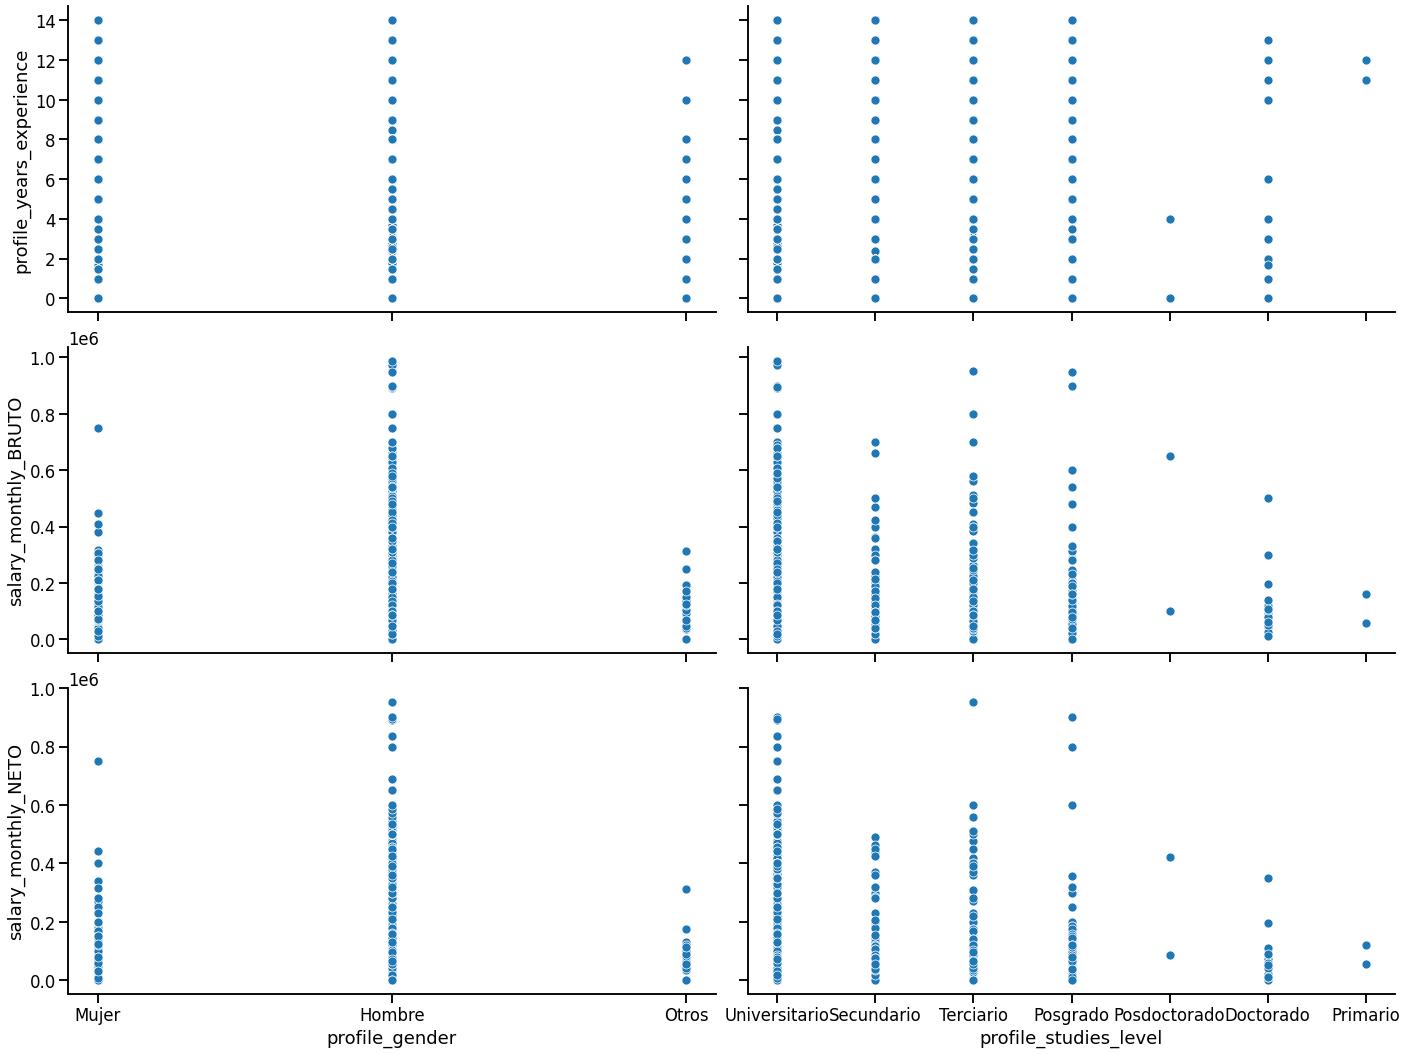

In [36]:
max_age = 15
seaborn.pairplot(data=df[(df.profile_years_experience < max_age) & (df.salary_monthly_BRUTO < 1000000) & (df.salary_monthly_NETO < 1000000) ],
                 y_vars=['profile_years_experience', 'salary_monthly_BRUTO','salary_monthly_NETO'],
                 x_vars=['profile_gender', 'profile_studies_level'],
                 aspect=2, height=5)

# Análisis de variables categóricas en conjunto

In [37]:
pd.crosstab(df_limpio.profile_gender, df_limpio.profile_studies_level)


profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,11,2,131,2,326,746,2694
Mujer,8,0,57,0,23,148,588
Otros,1,0,0,0,1,7,15


In [38]:
#Ordenamos lista de nombres de categorías
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado'] 

## Tabla de contingencia normalizada, la suma de los valores da 1, son proporciones, estima probabilidad
pd.crosstab(df_limpio.profile_gender, df_limpio.profile_studies_level, normalize=True)[sorted_studies_levels]

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,0.00,0.07,0.16,0.57,0.03,0.00,0.00
Mujer,0.00,0.00,0.03,0.12,0.01,0.00,0.00
Otros,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Análisis de variables numéricas 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<Figure size 576x288 with 0 Axes>

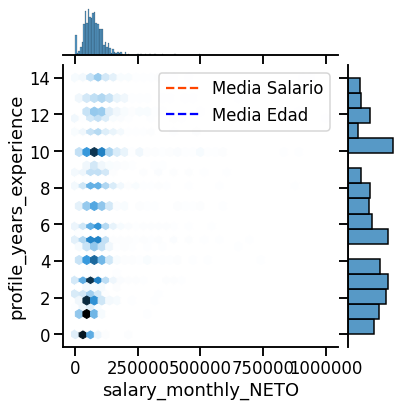

In [39]:
fig = plt.figure(figsize=(8,4))
seaborn.jointplot(data=df_limpio[df.profile_years_experience < max_age], x='salary_monthly_NETO',
                  y='profile_years_experience', kind='hex', height=6) 
plt.axvline(df[df.profile_age < max_age]['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df[df.profile_age < max_age]['profile_years_experience'].mean(), color='blue',
            linestyle='--', label='Media Edad')
plt.legend()
# Remove scietific notation
plt.ticklabel_format(useOffset=False, style='plain')

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [40]:
#Primero se visualiza la cantidad de datos por nivel de estudio.

df.profile_studies_level.value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

Variables:

* profile_studies_level
* salary_monthly_NETO

In [41]:
#Probabilidad que ocurra

### Subpoblación Nivel de Estudio Universitario

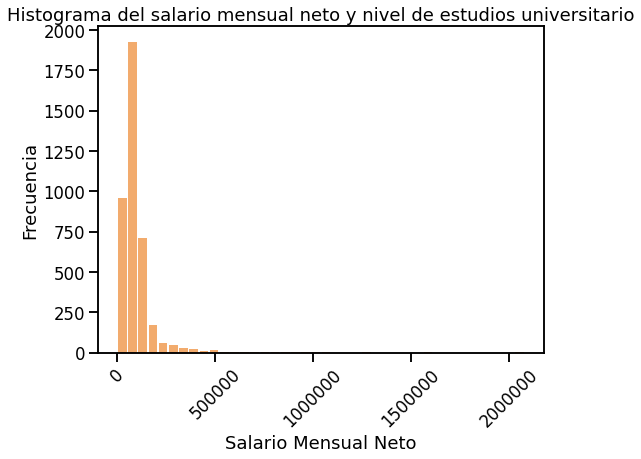

In [42]:
filter_universitario = df[df.profile_studies_level == "Universitario"]["salary_monthly_NETO"]

plt.figure(figsize=(8,6))

plt.hist(x=filter_universitario, bins=40, color="#F2AB6D", rwidth=0.85)

plt.title('Histograma del salario mensual neto y nivel de estudios universitario')

plt.xlabel('Salario Mensual Neto')

plt.ylabel('Frecuencia')

plt.ticklabel_format(axis='x', style='plain')



plt.xticks(rotation=45)

plt.show()


In [43]:
#Medidas de centralización

dictionary_universitario = {'Media':filter_universitario.mean(), 'Mediana': filter_universitario.median(), 'Moda': filter_universitario.mode()}

for i, j in dictionary_universitario.items():
  print(str(i) + ": $" + str(round(float(j))))

Media: $97410
Mediana: $80000
Moda: $80000


In [44]:
#Medidas de dispersión

dictionary2_universitario = {'Varianza':filter_universitario.var(), 'Desviación estándar': filter_universitario.std(), 'Coeficiente de Variación': filter_universitario.std()/filter_universitario.mean()}

for i, j in dictionary2_universitario.items():

    if j>2:
      print(str(i) + ": " + str(round(float(j))))
    else:
      print(str(i) + ": " + str(round(filter_universitario.std()/filter_universitario.mean(),3)))
  
  

Varianza: 9812270024
Desviación estándar: 99057
Coeficiente de Variación: 1.017


### COEFICIENTE DE VARIACION MAYOR A 1 

https://www.universoformulas.com/estadistica/descriptiva/coeficiente-variacion-pearson/#:~:text=El%20coeficiente%20de%20variaci%C3%B3n%20toma,y%20la%20media%20pierde%20confiabilidad.

### Subpoblación Nivel de Estudio Terciario

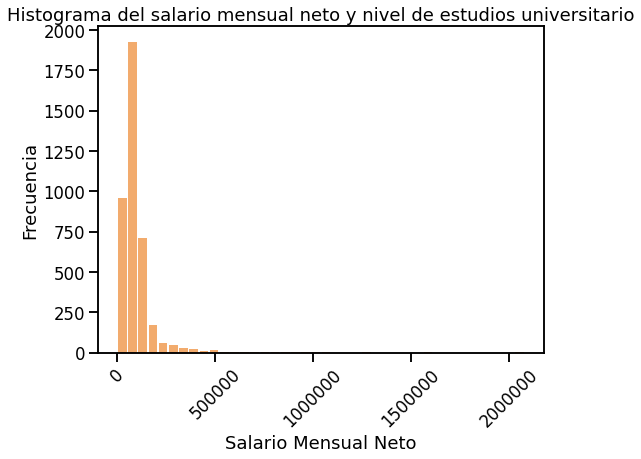

In [45]:
filter_terciario = df[df.profile_studies_level == "Terciario"]["salary_monthly_NETO"]

plt.figure(figsize=(8,6))

plt.hist(x=filter_universitario, bins=40, color="#F2AB6D", rwidth=0.85)

plt.title('Histograma del salario mensual neto y nivel de estudios universitario')

plt.xlabel('Salario Mensual Neto')

plt.ylabel('Frecuencia')

plt.ticklabel_format(axis='x', style='plain')



plt.xticks(rotation=45)

plt.show()


In [46]:
#Medidas de centralización

dictionary_terciario = {'Media':filter_terciario.mean(), 'Mediana': filter_terciario.median(), 'Moda': filter_terciario.mode()}

for i, j in dictionary_terciario.items():
  print(str(i) + ": $" + str(round(float(j))))

Media: $80814
Mediana: $68000
Moda: $80000


In [47]:
#Medidas de dispersión

dictionary2_terciario = {'Varianza':filter_terciario.var(), 'Desviación estándar': filter_terciario.std(), 'Coeficiente de Variación': filter_terciario.std()/filter_terciario.mean()}

for i, j in dictionary2_terciario.items():

    if j>2:
      print(str(i) + ": " + str(round(float(j))))
    else:
      print(str(i) + ": " + str(round(filter_terciario.std()/filter_terciario.mean(),3)))

Varianza: 5335579585
Desviación estándar: 73045
Coeficiente de Variación: 0.904


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


#### Posibles variables numéricas.

In [48]:
print('Posibles variables numéricas: \n')
for i in df.select_dtypes(['int64','float64']).columns:
  print(i)

Posibles variables numéricas: 

profile_age
profile_years_experience
work_years_in_company
work_years_in_current_position
work_people_in_charge_of
salary_on_call_duty_charge
salary_monthly_BRUTO
salary_monthly_NETO
salary_satisfaction
salary_comparison_last_semester
salary_percentage_inflation_adjustment_2020
salary_month_last_inflation_adjustment
company_recommended
company_diversity_policies


#### Posibles variables categóricas.

In [114]:
print('Posibles variables categóricas: \n')
for i in df.select_dtypes(['object']).columns:
  print(i)

Posibles variables categóricas: 

profile_gender
work_country
work_province
profile_studies_level
profile_studies_level_state
profile_career
profile_university
profile_specialization_courses
profile_open_source_contributions
profile_programming_as_hobby
work_role
tools_platform
tools_programming_languages
tools_frameworks
tools_data_bases
tools_qa_testing
tools_IDEs
tools_work_pc_os
tools_cellphone_os
work_on_call_duty
work_on_call_duty_charge_type
work_contract_type
salary_in_usd
salary_has_bonus
salary_bonus_tied_to
salary_inflation_adjustment_2020
work_has_violence_situations
profile_sexual_orientation
profile_has_disabilities
profile_has_disabilities_hiring_difficulties
company_employee_number
company_main_activity
company_extra_benefits
company_best_companies_city


#### Elección de variables

Variables numéricas:

*   work_years_in_company
*   profile_years_experience

Variable categórica:

*   salary_in_usd     



#### Se estudia la dispersión con un gráfico scatterplot

Text(0, 0.5, 'Años de trabajo en la compañía')

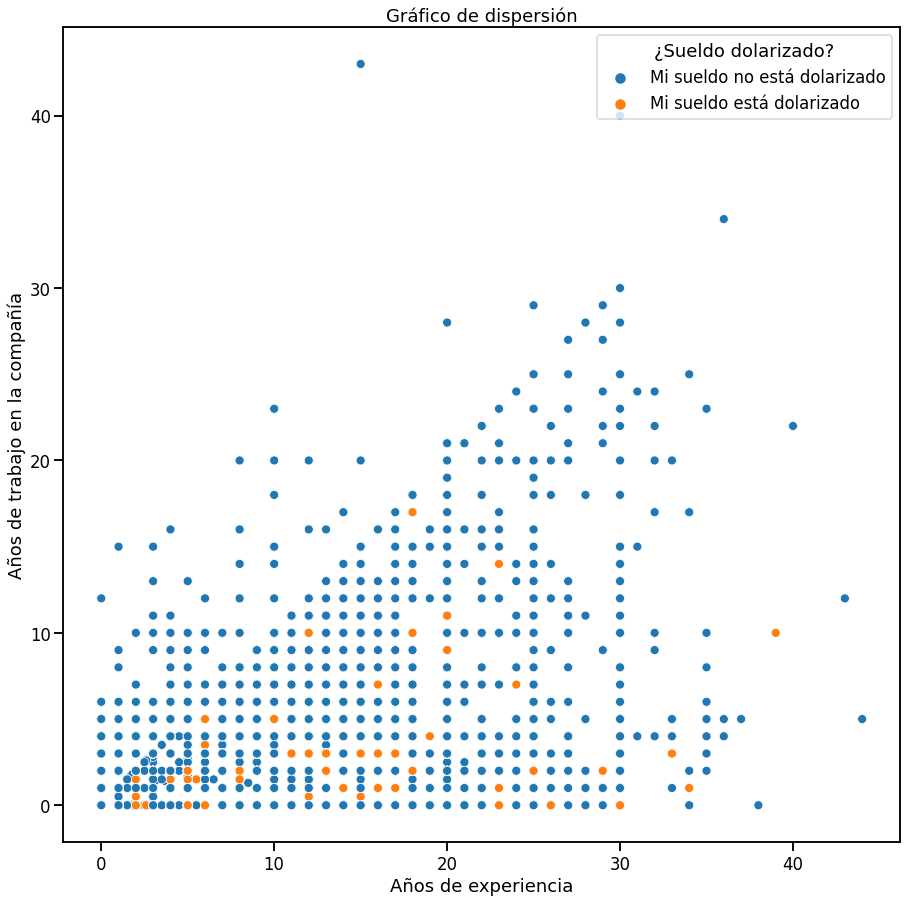

In [115]:
plt.figure(figsize = [15,15])
seaborn.scatterplot(data=df[df.profile_years_experience < 70], y='work_years_in_company',
                  x='profile_years_experience', hue='salary_in_usd').legend(title='¿Sueldo dolarizado?')
plt.title('Gráfico de dispersión')
plt.xlabel('Años de experiencia')
plt.ylabel('Años de trabajo en la compañía')

#### Conclusiones



*   Primeramente se puede observar que los valores que están por encima de la línea de 45°, se pueden suponer como erróneos, ya que no se puede tener más años en la compañía que años de experiencia total.

  Otro análisis para abordar esta situación es que puede deberse a personas que trabajaban en la compañía en otro puesto no relacionado a sistemas antes de tener el actual.

  Para descartar valores erróneos, se puede analizar la edad de las personas, de esta manera se podría sacar los valores que impliquen experiencia de trabajo a una edad menor de los 18 años.

*   El segundo punto a tener en cuenta, son los valores que se encuentran debajo de la línea de 45°, esto implica que la mayoría de las personas encuestadas no tienen como primer trabajo el puesto actual.

*   Siguiendo con el abordaje a partir de la línea de 45°, se tiene que los valores que se encuentran sobre la misma, son mucho menos, como en el análisis anterior implica que son pocas las personas que permanecen en su primer trabajo.

*  El cuarto punto a tener en cuenta es la variable categórica, se va a hacer foco en los sueldos dolarizados, se puede observar que la mayoría de los sueldos dolarizados corresponden a personas que tienen entre 5 y 20 años de experiencia.

*  El quinto y último punto a analizar es que todas las personas encuestadas con salario en dólares tienen como mínimo 2 años de experiencia laboral.


